## How are in-demand skills trending for Data Analysts within the UK

### Methodology

1. Aggregate skill counts monthly.
2. Re-analyse based on percentage of total jobs
3. Plot the monthly skill demand

In [24]:
# import libararies
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns

# load data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [25]:
df_da_uk = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United Kingdom')].copy()


In [26]:
df_da_uk['job_posted_month_no'] = df_da_uk['job_posted_date'].dt.month

In [27]:
df_da_uk_expl = df_da_uk.explode('job_skills')

In [28]:
df_da_uk_pivot = df_da_uk_expl.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_da_uk_pivot.loc['Total'] = df_da_uk_pivot.sum()

df_da_uk_pivot = df_da_uk_pivot[df_da_uk_pivot.loc['Total'].sort_values(ascending=False).index]

df_da_uk_pivot = df_da_uk_pivot.drop('Total')

In [29]:
da_totals = df_da_uk.groupby('job_posted_month_no').size()

In [32]:
df_da_uk_perc = df_da_uk_pivot.div(da_totals/100, axis=0)

df_da_uk_perc = df_da_uk_perc.reset_index()
df_da_uk_perc['job_posted_month'] = df_da_uk_perc['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%B'))
df_da_uk_perc = df_da_uk_perc.set_index('job_posted_month')
df_da_uk_perc = df_da_uk_perc.drop(columns='job_posted_month_no')


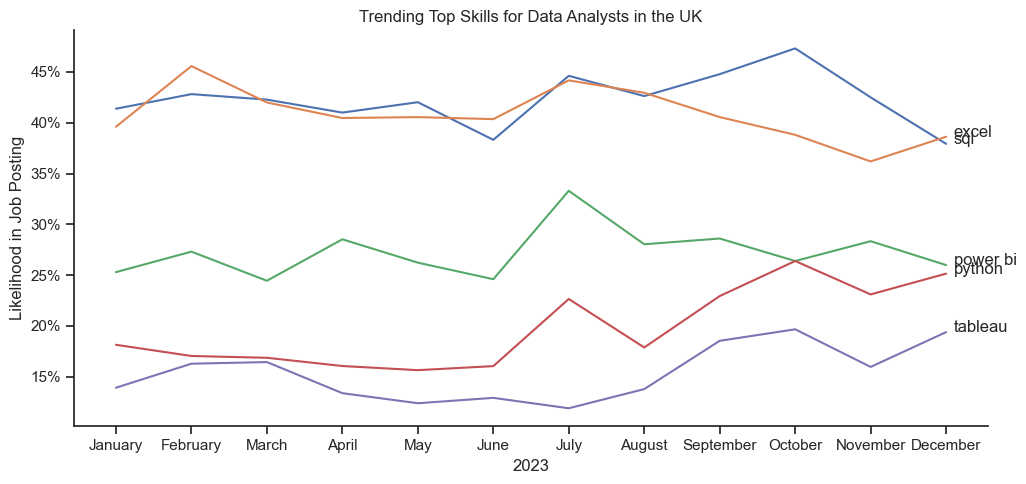

In [91]:
df_plot = df_da_uk_perc.iloc[:, :5]


sns.set_theme(style="ticks")
sns.color_palette("YlOrBr", as_cmap=True)

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_plot, dashes=False)
sns.despine()
plt.title('Trending Top Skills for Data Analysts in the UK')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.tight_layout()

from matplotlib.ticker import PercentFormatter

ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    plt.text(11.1, df_plot.iloc[-1, i], df_plot.columns[i])
    
plt.show()